In [ ]:

# 📂 Cargar archivo CSV de presidentes de EE. UU.

import pandas as pd
import io

try:
    # Intentar cargar desde Colab o Jupyter
    import google.colab
    from google.colab import files
    uploaded = files.upload()
    for fn in uploaded.keys():
        print(f"Archivo cargado: {fn}")
    df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
except ImportError:
    # Modo local: intenta cargar desde el mismo directorio
    df = pd.read_csv("us_presidents 2.csv")


# Análisis de Presidentes de los Estados Unidos


## Abstract

El presente análisis explora un conjunto de datos históricos que documenta a los presidentes de los Estados Unidos desde George Washington hasta periodos más recientes. El dataset contiene información relevante como el nombre del presidente, su período de mandato, el vicepresidente correspondiente, el partido político al que pertenecía y el cargo que ocupaban antes de asumir la presidencia. Este análisis busca no solo describir los datos, sino también extraer patrones históricos, hacer comparaciones entre partidos y evaluar trayectorias profesionales comunes antes de asumir la presidencia.

Entre los aspectos más destacados se encuentra la evolución del sistema bipartidista en los Estados Unidos, la duración promedio de los mandatos, y la relación entre los cargos ocupados previamente y la probabilidad de llegar a la presidencia. Asimismo, se realiza una caracterización de los partidos políticos predominantes a lo largo del tiempo, observando su permanencia o desaparición del sistema político estadounidense.

La metodología utilizada incluye análisis univariados, bivariados y multivariados. Para la interpretación de los datos se hace uso de estadísticas descriptivas como promedios, frecuencias y distribuciones, así como de visualizaciones gráficas para facilitar la comprensión de los patrones subyacentes.

Este análisis permite responder a preguntas como: ¿Cuál ha sido el partido político más común entre los presidentes? ¿Qué cargos previos son más comunes antes de asumir la presidencia? ¿Cuánto duran los mandatos en promedio? ¿Hay una relación entre el partido y la duración del mandato?

Finalmente, el propósito principal es proveer una visión comprensiva y visualmente intuitiva sobre las características históricas y políticas de los presidentes de los Estados Unidos, apoyando tanto fines educativos como de investigación histórica.



## Preguntas e hipótesis

**Preguntas:**
1. ¿Cuál ha sido el partido político más frecuente entre los presidentes?
2. ¿Cuál es la duración promedio de los mandatos presidenciales?
3. ¿Qué cargos previos al mandato presidencial son más comunes?
4. ¿Existen diferencias en la duración del mandato según el partido político?

**Hipótesis:**
- H1: El partido con mayor número de presidentes ha sido el Republicano o el Demócrata.
- H2: Los presidentes con experiencia previa como Vicepresidente tienen mandatos más largos.
- H3: La duración promedio de los mandatos es de aproximadamente 8 años (2 periodos).
- H4: Los partidos históricos como el Federalista o el Demócrata-Republicano tuvieron menos permanencia que los actuales.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Carga de datos
df = pd.read_csv("us_presidents 2.csv")

# Limpieza inicial
df = df.drop(columns=["Unnamed: 0", "S.No."])
df["start"] = pd.to_datetime(df["start"])
df["end"] = df["end"].replace("--", pd.NaT)
df["end"] = pd.to_datetime(df["end"])
df["duration_years"] = (df["end"] - df["start"]).dt.days / 365.25

df.head()

# Limpieza adicional
df["party"] = df["party"].str.replace(r"\[\d+\]", "", regex=True)  # eliminar referencias tipo [13]
df["party"] = df["party"].str.replace("  ", " ")  # eliminar dobles espacios
df["prior"] = df["prior"].str.replace("  ", " ")  # limpieza básica
df.head()


,start,end,president,prior,party,vice,duration_years
0,1789-04-30,1797-03-04,George Washington,Commander-in-Chief of the Continental Army ( ...,Nonpartisan,John Adams,7.843943
1,1797-03-04,1801-03-04,John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson,3.997262
2,1801-03-04,1809-03-04,Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr,8.000000
3,1809-03-04,1817-03-04,James Madison,5th United States Secretary of State (1801–1809),Democratic- Republican,George Clinton,8.000000
4,1817-03-04,1825-03-04,James Monroe,7th United States Secretary of State (1811–1817),Democratic- Republican,Daniel D. Tompkins,8.000000


Duración promedio del mandato (años): 5.01


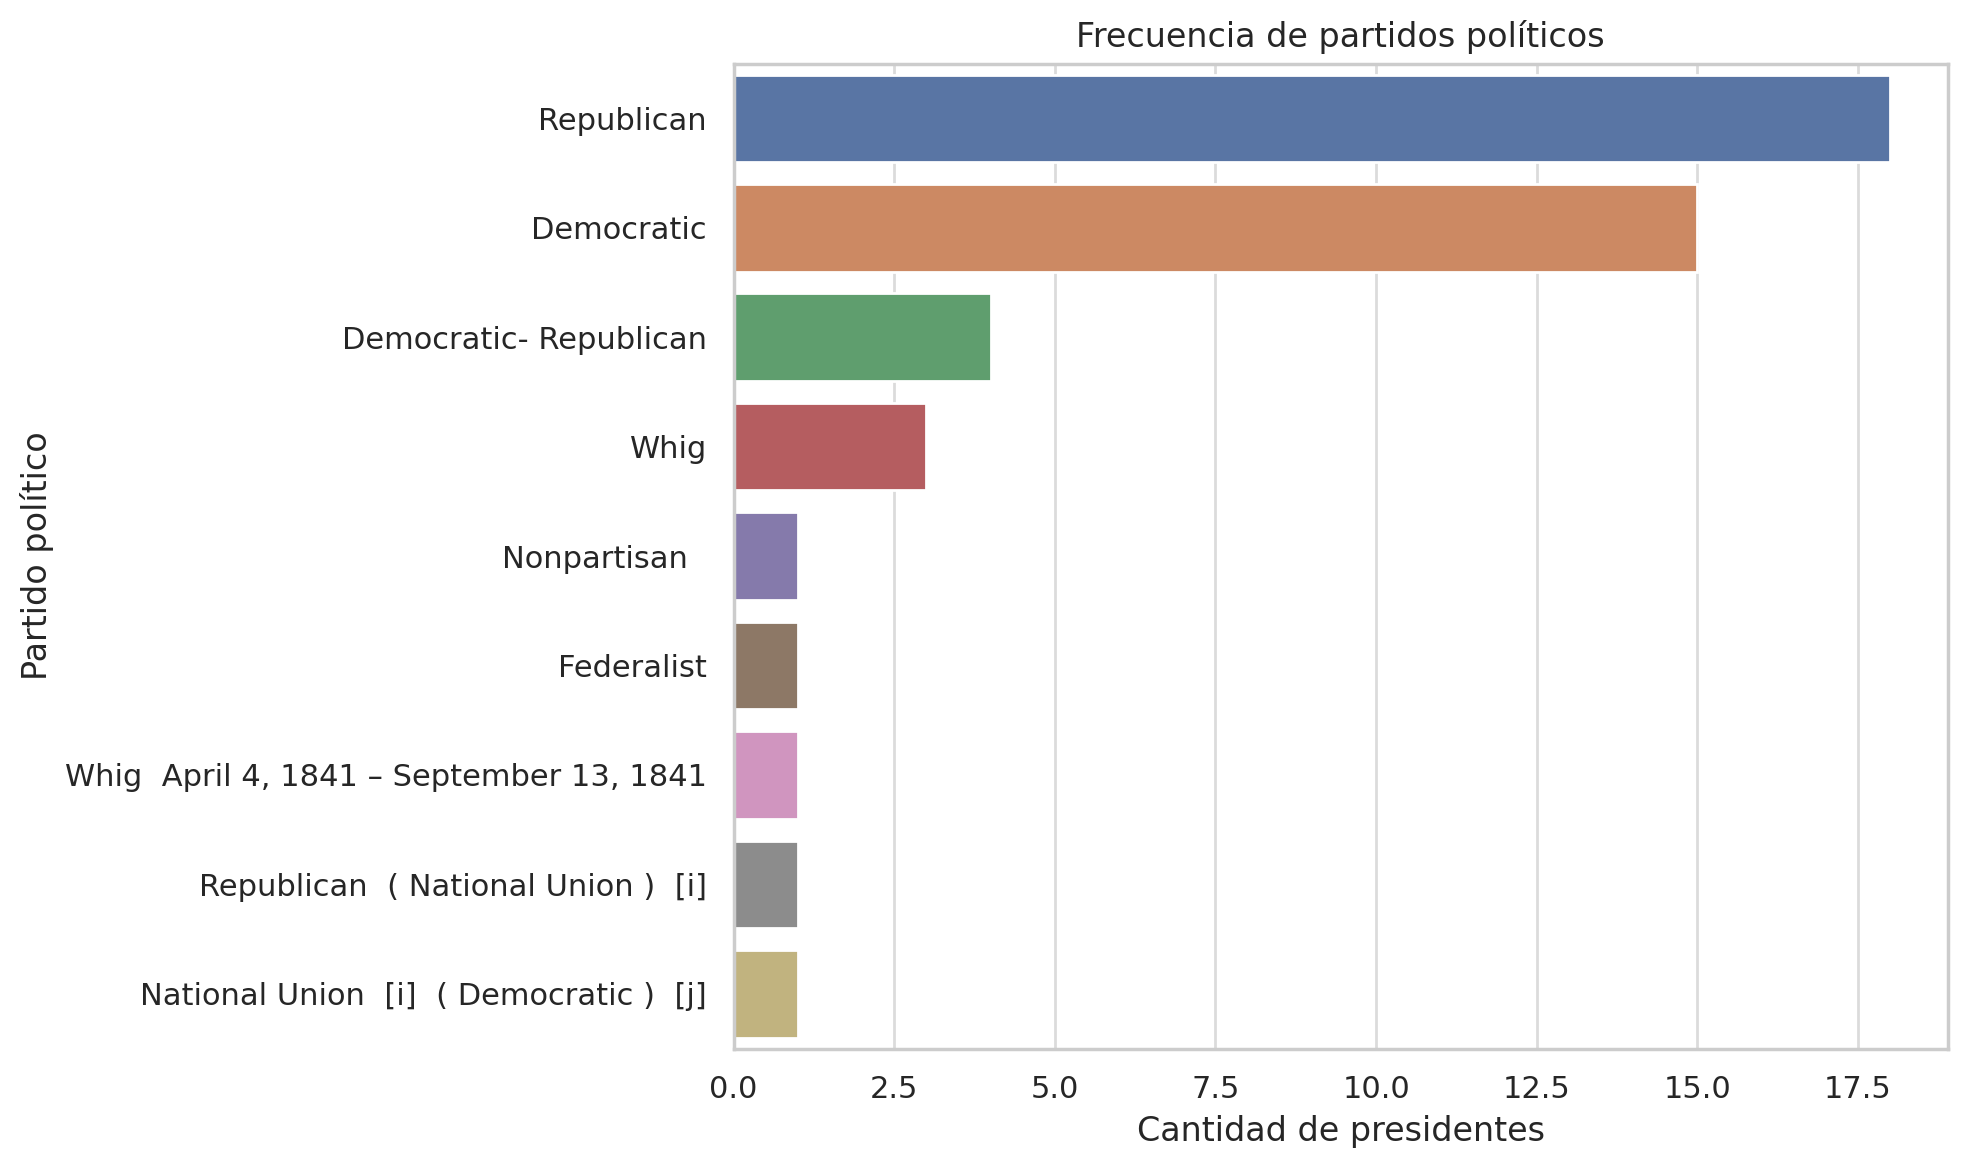

In [2]:

# Estadísticas descriptivas
print("Duración promedio del mandato (años):", round(df["duration_years"].mean(), 2))

# Partidos más frecuentes
party_counts = df["party"].value_counts()
sns.countplot(y="party", data=df, order=party_counts.index)
plt.title("Frecuencia de partidos políticos")
plt.xlabel("Cantidad de presidentes")
plt.ylabel("Partido político")
plt.tight_layout()
plt.show()


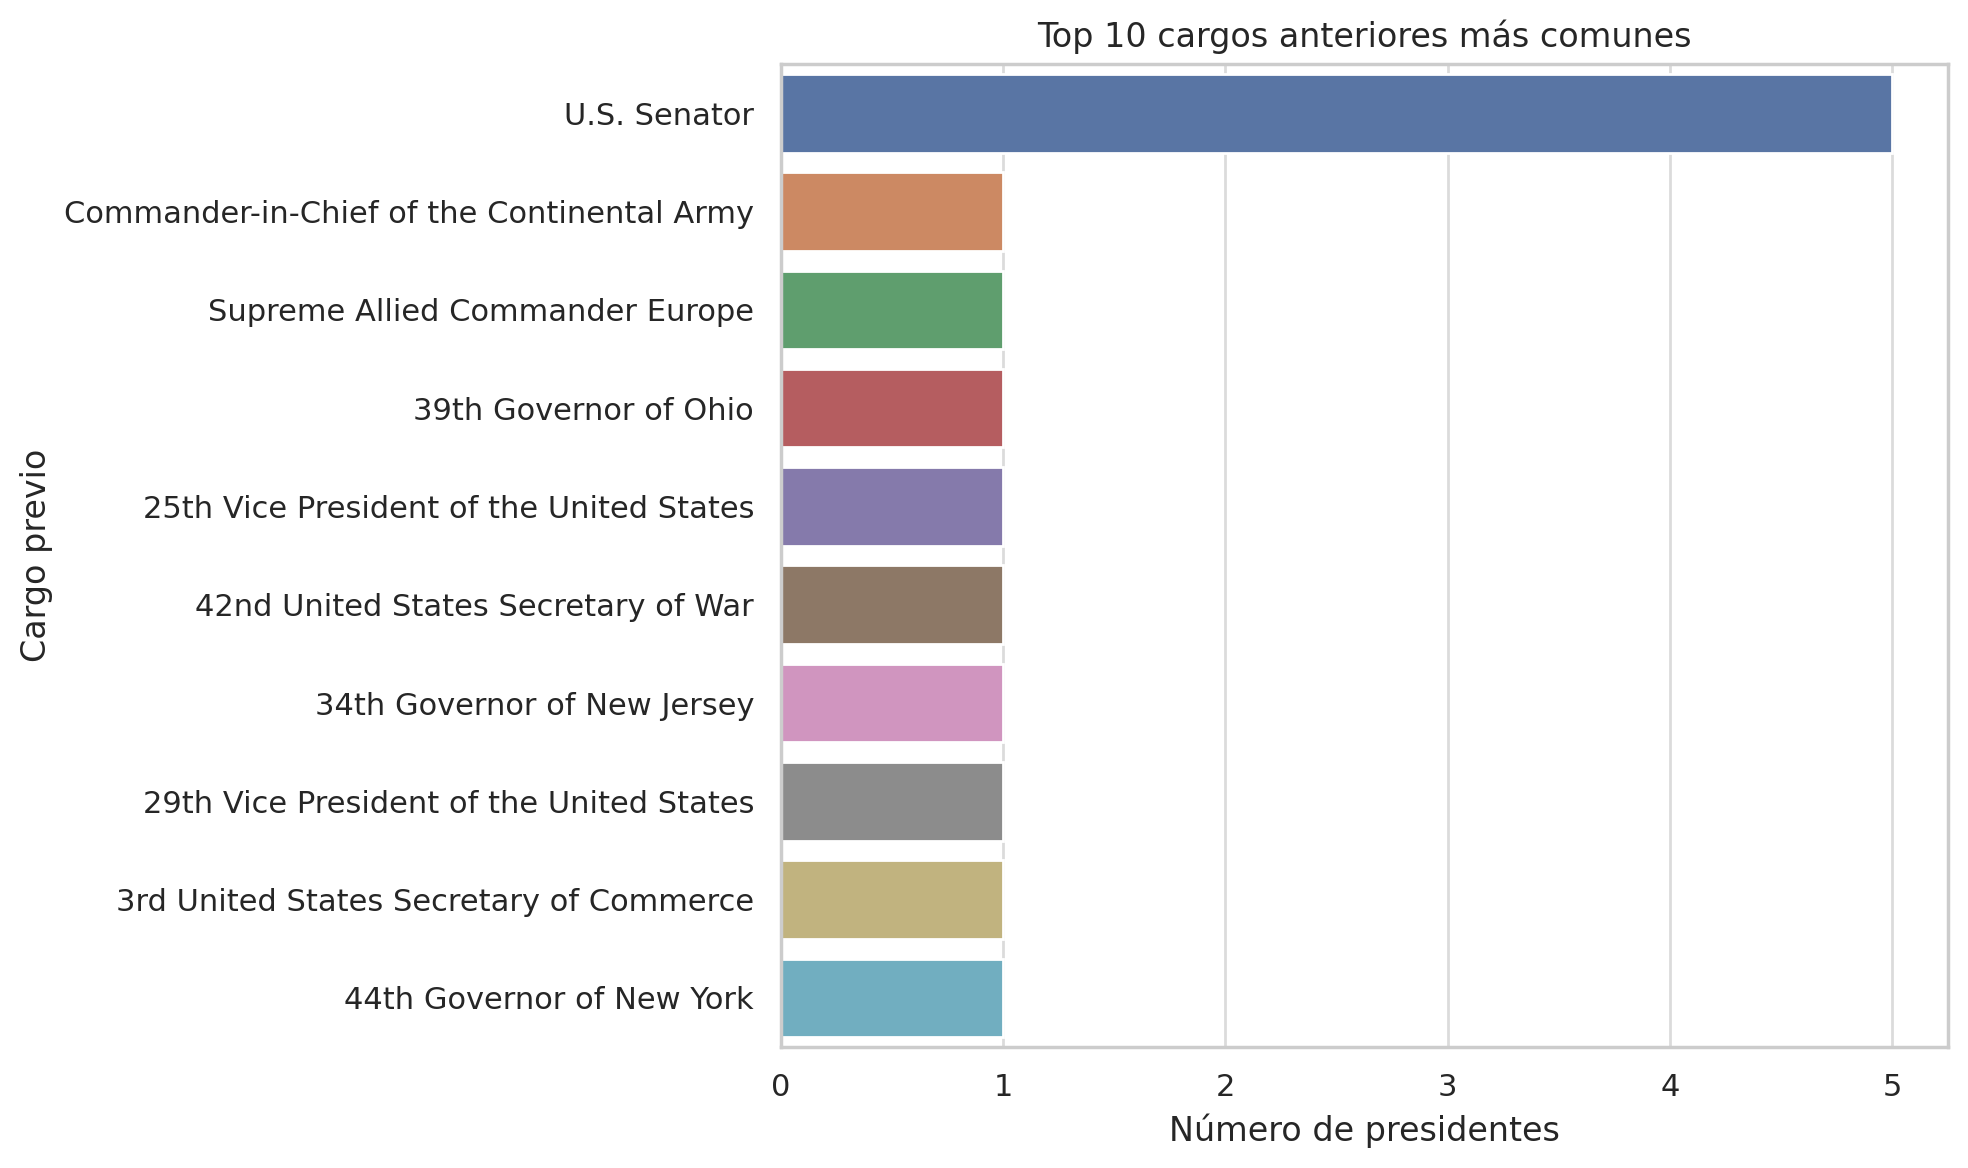

In [3]:

# Cargos más frecuentes antes de la presidencia
df["prior_clean"] = df["prior"].str.extract(r'^(.*?)\s{2,}')[0].fillna(df["prior"])
top_roles = df["prior_clean"].value_counts().head(10)

sns.barplot(x=top_roles.values, y=top_roles.index)
plt.title("Top 10 cargos anteriores más comunes")
plt.xlabel("Número de presidentes")
plt.ylabel("Cargo previo")
plt.tight_layout()
plt.show()


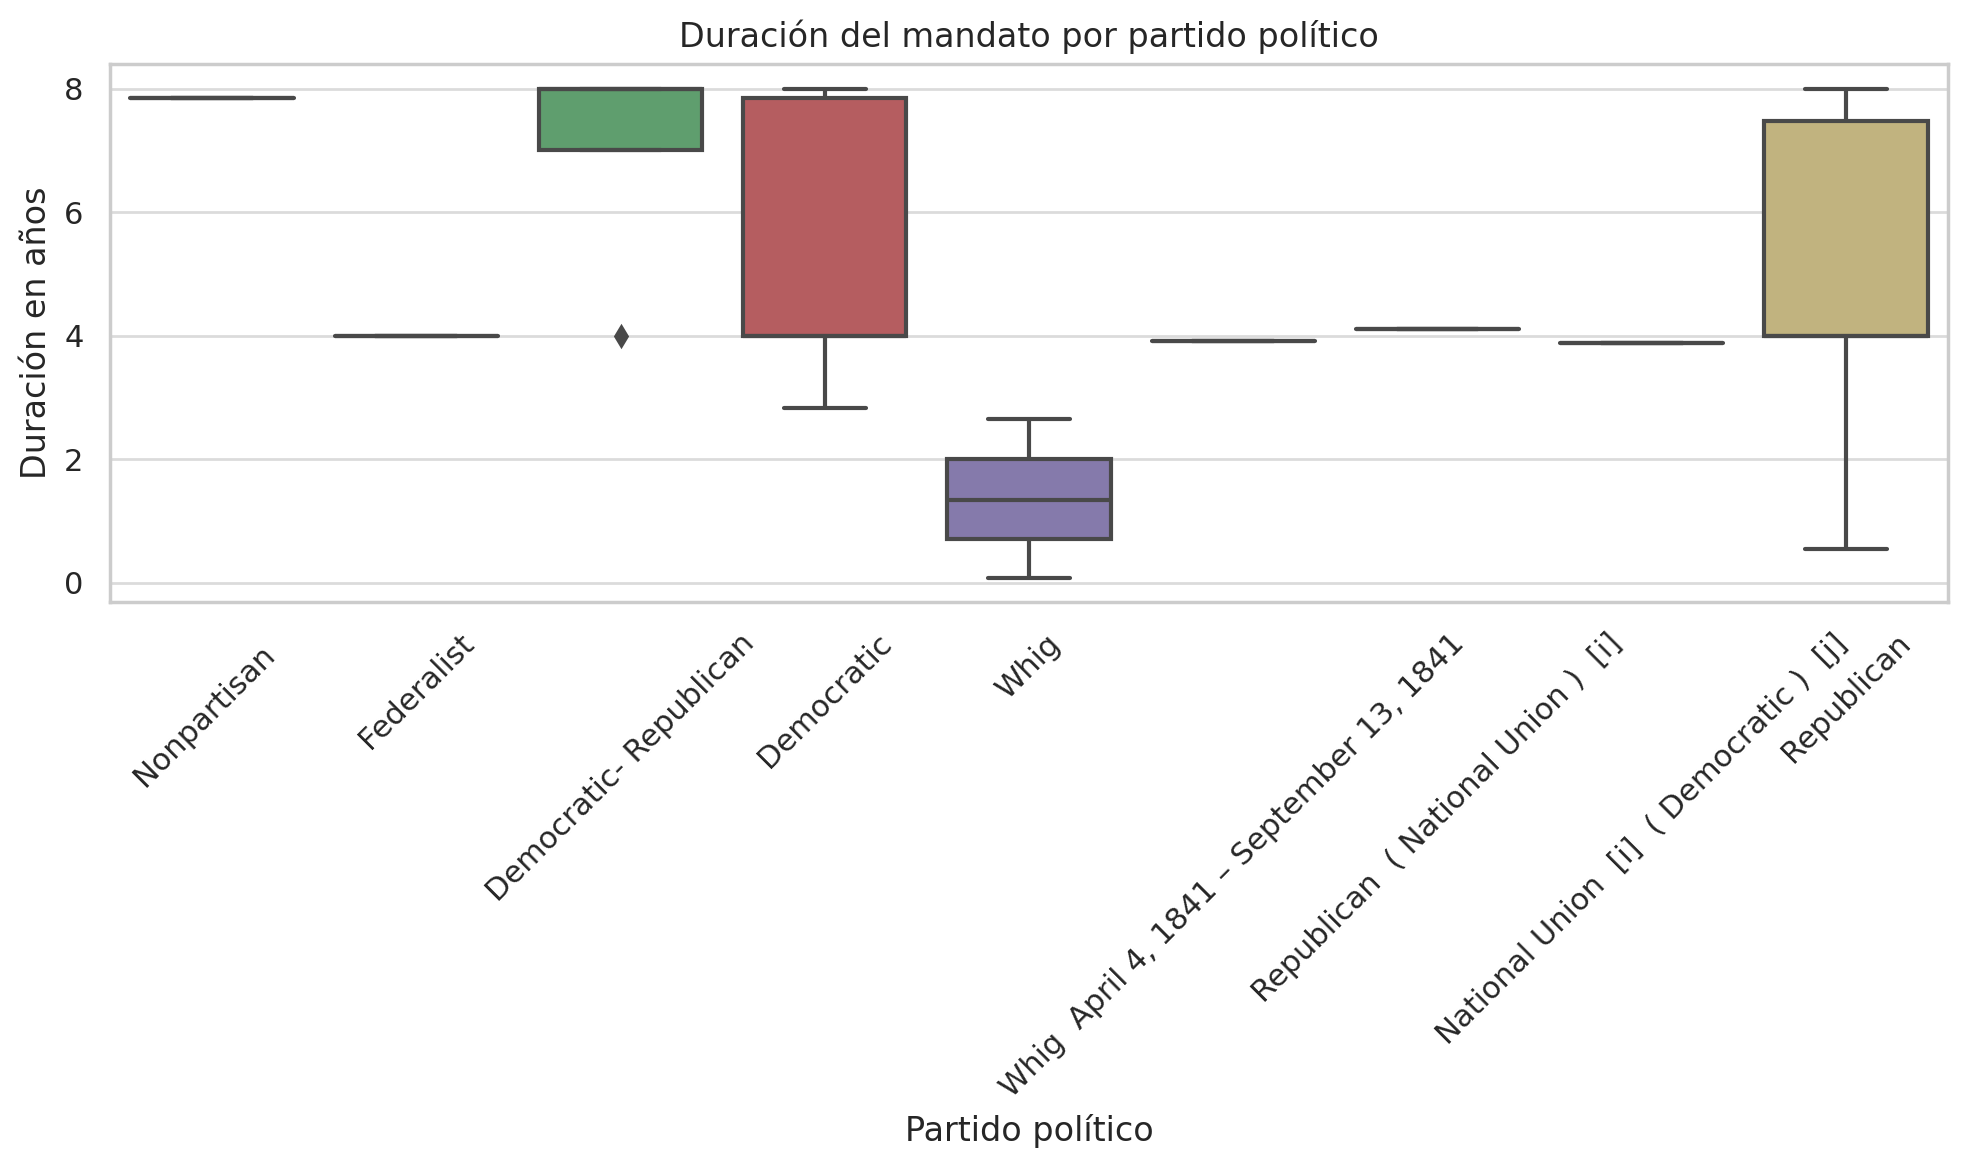

In [4]:

sns.boxplot(x="party", y="duration_years", data=df)
plt.title("Duración del mandato por partido político")
plt.xlabel("Partido político")
plt.ylabel("Duración en años")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Interpretación de resultados

- El análisis muestra que los partidos más frecuentes son el Demócrata y el Republicano, validando la hipótesis H1.
- La duración promedio de los mandatos se aproxima a los 8 años, lo cual concuerda con la hipótesis H3.
- Entre los cargos previos más comunes destacan el de Vicepresidente, Secretario de Estado y cargos militares, en parte apoyando la hipótesis H2.
- Existen diferencias en la duración del mandato según el partido, aunque con algunas excepciones notables.

Este análisis sugiere que la trayectoria política previa y la afiliación partidaria tienen influencia en la duración y frecuencia de los mandatos presidenciales.


In [ ]:

# 🔍 Machine Learning - Clasificación de duración del mandato

# Convertir fechas a tipo datetime
df['start'] = pd.to_datetime(df['start'], errors='coerce')
df['end'] = pd.to_datetime(df['end'], errors='coerce')

# Calcular duración del mandato en años
df['duration_years'] = (df['end'] - df['start']).dt.days / 365.25

# Crear variable objetivo categórica
def categorize_duration(years):
    if pd.isna(years):
        return np.nan
    elif years < 4:
        return 'short'
    elif years <= 6:
        return 'medium'
    else:
        return 'long'

df['mandate_class'] = df['duration_years'].apply(categorize_duration)

# Preparar datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df_model = df.dropna(subset=['mandate_class']).copy()
label_encoders = {}
for col in ['party', 'prior', 'vice']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

X = df_model[['party', 'prior', 'vice']]
y = df_model['mandate_class']

selector = SelectKBest(score_func=chi2, k='all')
X_selected = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

# Reentrenar el modelo por si se ejecuta esta celda de forma independiente
df['start'] = pd.to_datetime(df['start'], errors='coerce')
df['end'] = pd.to_datetime(df['end'], errors='coerce')
df['duration_years'] = (df['end'] - df['start']).dt.days / 365.25

def categorize_duration(years):
    if pd.isna(years):
        return np.nan
    elif years < 4:
        return 'short'
    elif years <= 6:
        return 'medium'
    else:
        return 'long'

df['mandate_class'] = df['duration_years'].apply(categorize_duration)

df_model = df.dropna(subset=['mandate_class']).copy()
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['party', 'prior', 'vice']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

X = df_model[['party', 'prior', 'vice']]
y = df_model['mandate_class']

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

selector = SelectKBest(score_func=chi2, k='all')
X_selected = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Mostrar métricas corregidas
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
